# Student Predictions

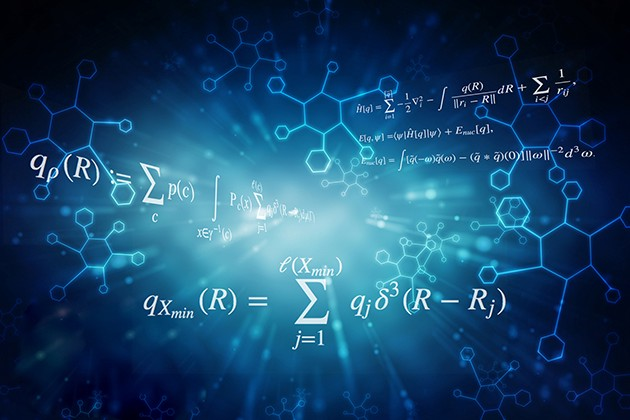

## Problem Statement

Can we predict students' performance in academics in STEM and Non-STEM?
<br>
Is there a difference in STEM and NON-STEM when looking at the performance of students and their features?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) # ignore future warnings

In [2]:
math_df = pd.read_csv(r'student-mat.csv', sep=';')
por_df = pd.read_csv(r'student-por.csv', sep=';')

In [3]:
math_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [4]:
por_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

## Data Wrangling and Visualization of the dataset

<ol>
    <li>Filling in missing data</li>
    <li>Smoothing-out noisy data</li>
    <li>Removing outliers and artifacts</li>
    <li>Correcting inconsistent data</li>
    <li>Removing duplicate data</li>
</ol>

## Check for missing values

There seems to be no missing values in the math data set or the poruese language dataset. 

In [5]:
math_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
por_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Check for dulicated values

There are no duplicated values in either of the datasets, so we can move onto the next step.

In [7]:
math_df[math_df.duplicated(keep=False)]

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]

In [8]:
por_df[por_df.duplicated(keep=False)]

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]

## Histograms of datasets

Many of the histograms are tail heavy, which may impact the performance of the ML alogorithms. We can adjust this to a more bell shaped curve transforming some of the features. The range of values goes from 0 - 500 in most feature spaces. There is not a major need for feature scaling.

### Math Dataset

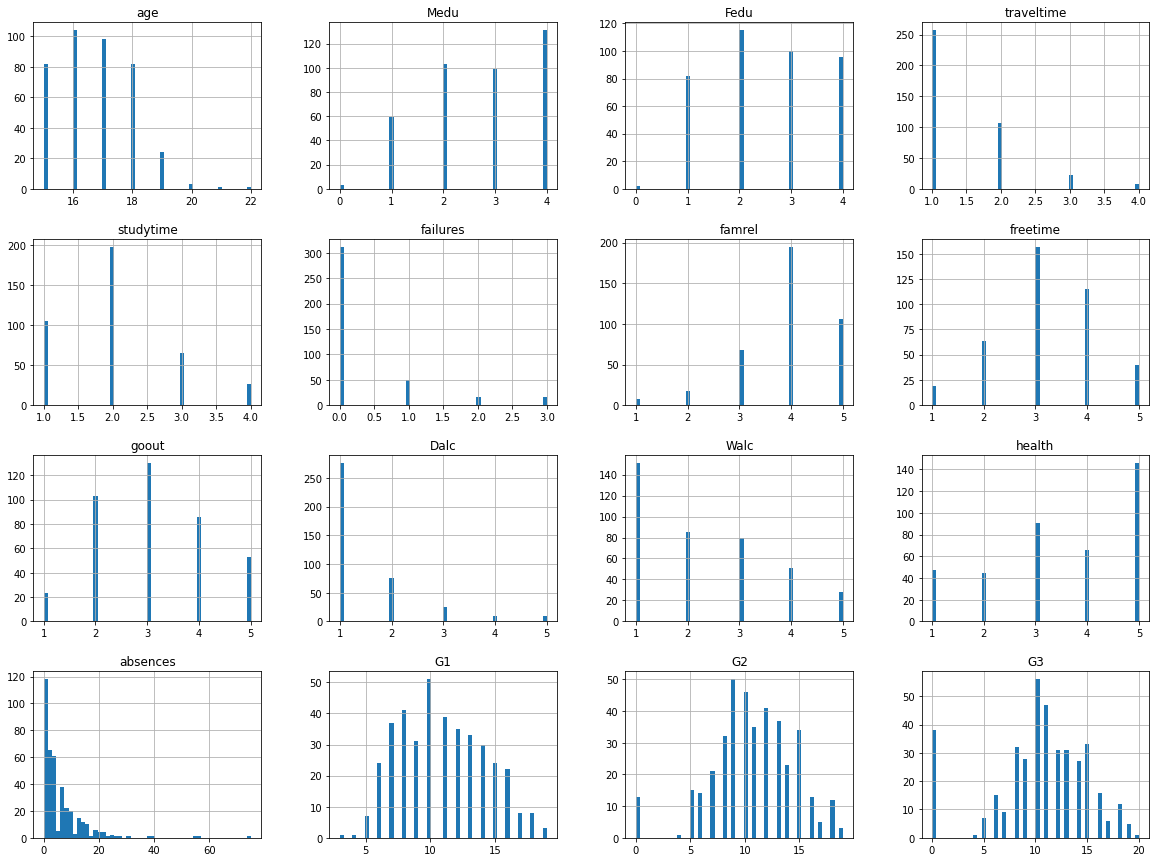

In [9]:
%matplotlib inline 
math_df.hist(bins = 50, figsize = (20, 15))
plt.show()

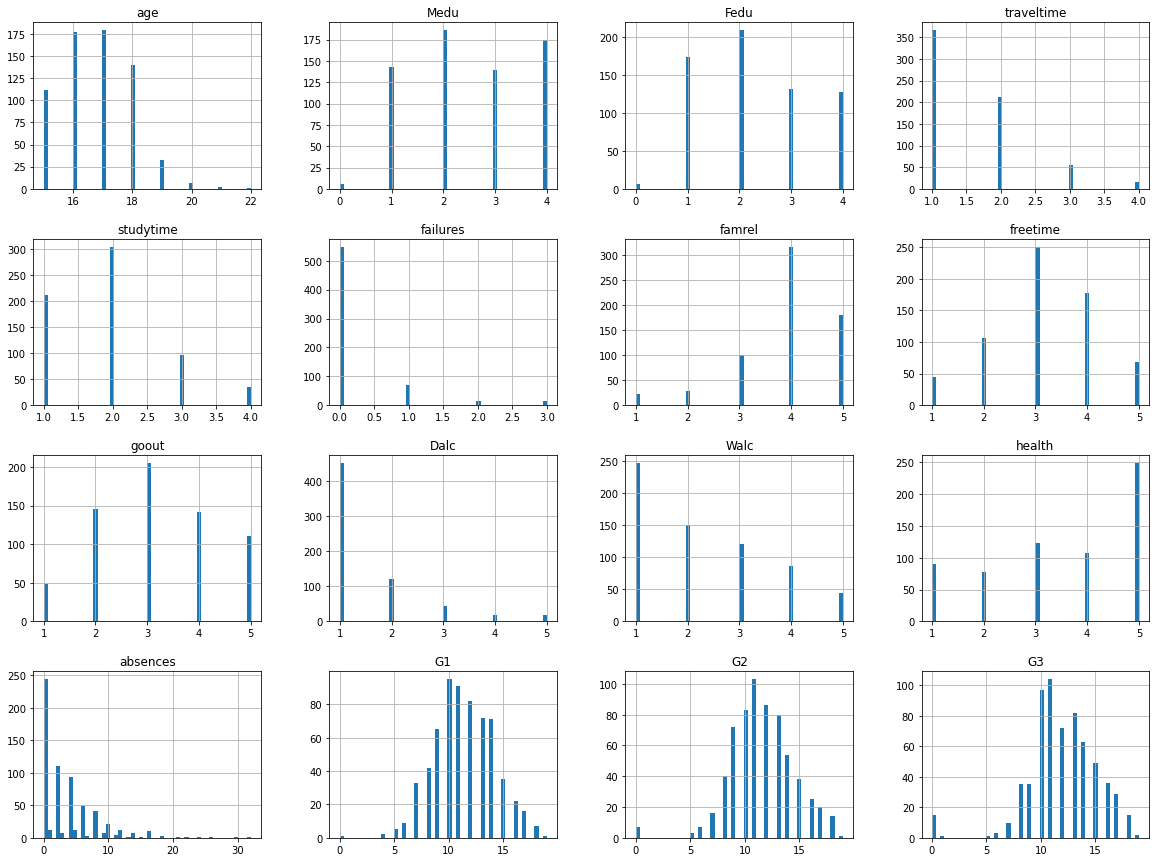

In [10]:
%matplotlib inline 
por_df.hist(bins = 50, figsize = (20, 15))
plt.show()

## Create a Test Set

In [11]:
train_set, test_set = train_test_split(math_df, test_size = 0.2, random_state = 42)

## Look for Correlations in the dataset

The distribution plot of the target variable grades shows it is slightly left skewed. It seems they're might be an outlier with students with a 0 in they're grades. G1, G2 and G3 are highly positvely correlated with each other which makes sense they are first period and second period grades. Fathers and mothers education are also highly positvely correlated with each other. Workday alcohol consumption and weekday alcohol consumption are also highly positvely correlated together. Weekly alcohol content and going out with friends are also highly correlated with each other. Since we have workday and weekend alcohol consumtion, we can remove one of these as they tend to correlate at a greater extent to other features and they are similar. 

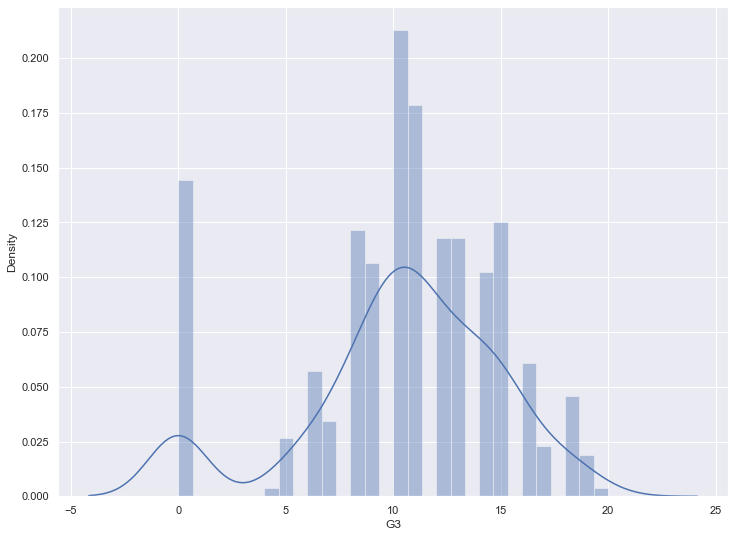

<AxesSubplot:>

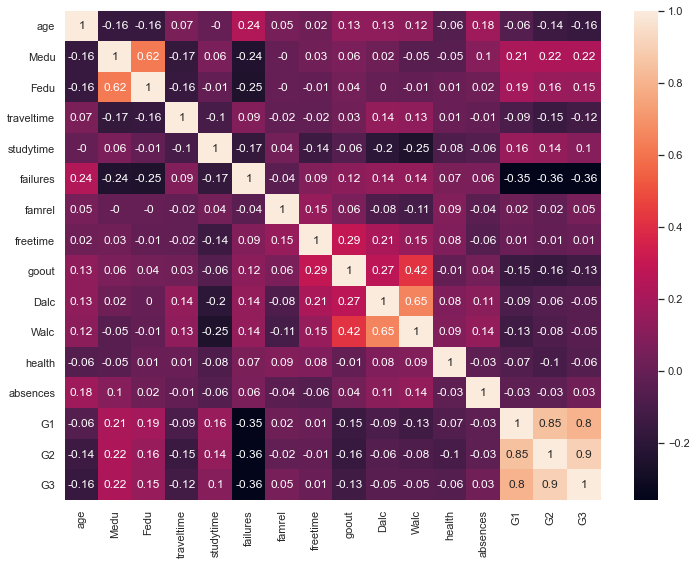

In [12]:
sns.set(rc = {'figure.figsize': (12, 9)})
sns.distplot(math_df['G3'], bins=30)
plt.show()
corr_matrix = math_df.corr().round(2)
sns.heatmap(corr_matrix, annot = True)

## Check the data types of each feature

In [13]:
math_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [14]:
por_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Use one hot encoding to change categorical data

After looking at the data types for the two datasets, we can see that there are data types that are generic objects. These represent cateogirical variables that would need to be encoded for our regression models. Features to change are:

<ol>
    <li>school</li>
    <li>sex</li>
    <li>address</li>
    <li>famsize</li>
    <li>Pstatus</li>
    <li>Mjob</li>
    <li>Fjob</li>
    <li>reason</li>
    <li>guardian</li>
    <li>schoolsup</li>
    <li>famsup</li>
    <li>paid</li>
    <li>activities</li>
    <li>nursery</li>
    <li>higher</li>
    <li>internet</li>
    <li>romantic</li>    
</ol>

In [15]:
math_df_encoded = math_df.copy()
labelencoder = LabelEncoder()
math_df_encoded['school_dummy'] = labelencoder.fit_transform(math_df_encoded["school"])
math_df_encoded['sex_dummy'] = labelencoder.fit_transform(math_df_encoded["sex"])
math_df_encoded['address_dummy'] = labelencoder.fit_transform(math_df_encoded["address"])
math_df_encoded['famsize_dummy'] = labelencoder.fit_transform(math_df_encoded["famsize"])
math_df_encoded['pstatus_dummy'] = labelencoder.fit_transform(math_df_encoded["Pstatus"])
math_df_encoded['fjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Fjob"])
math_df_encoded['mjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Mjob"])
math_df_encoded['reason_dummy'] = labelencoder.fit_transform(math_df_encoded["reason"])
math_df_encoded['guardian_dummy'] = labelencoder.fit_transform(math_df_encoded["guardian"])
math_df_encoded['schoolsup_dummy'] = labelencoder.fit_transform(math_df_encoded["schoolsup"])
math_df_encoded['famsup_dummy'] = labelencoder.fit_transform(math_df_encoded["famsup"])
math_df_encoded['paid_dummy'] = labelencoder.fit_transform(math_df_encoded["paid"])
math_df_encoded['activities_dummy'] = labelencoder.fit_transform(math_df_encoded["activities"])
math_df_encoded['nursery_dummy'] = labelencoder.fit_transform(math_df_encoded["nursery"])
math_df_encoded['higher_dummy'] = labelencoder.fit_transform(math_df_encoded["higher"])
math_df_encoded['internet_dummy'] = labelencoder.fit_transform(math_df_encoded["internet"])
math_df_encoded['romantic_dummy'] = labelencoder.fit_transform(math_df_encoded["romantic"])

In [16]:
cleaned_math_df = math_df_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                                  "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                                  "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                                  "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                                  "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                                  "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                                  "health", "absences", "G1", "G2", "G3"]]
cleaned_math_df

school_dummy  sex_dummy  age  address_dummy  famsize_dummy  \
0               0          0   18              1              0   
1               0          0   17              1              0   
2               0          0   15              1              1   
3               0          0   15              1              0   
4               0          0   16              1              0   
..            ...        ...  ...            ...            ...   
390             1          1   20              1              1   
391             1          1   17              1              1   
392             1          1   21              0              0   
393             1          1   18              0              1   
394             1          1   19              1              1   

     pstatus_dummy  Medu  Fedu  mjob_dummy  fjob_dummy  ...  romantic_dummy  \
0                0     4     4           0           4  ...               0   
1                1     1     1           0           2  ...               0   
2                1     1     1           0           2  ...               0   
3                1     4     2           1           3  ...               1   
4                1     3     3           2           2  ...               0   
..             ...   ...   ...         ...         ...  ...             ...   
390              0     2     2           3           3  ...               0   
391              1     3     1           3           3  ...               0   
392              1     1     1           2           2  ...               0   
393              1     3     2           3           2  ...               0   
394              1     1     1           2           0  ...               0   

     famrel  freetime  goout  Walc  health  absences  G1  G2  G3  
0         4         3      4     1       3         6   5   6   6  
1         5         3      3     1       3         4   5   5   6  
2         4         3      2     3       3        10   7   8  10  
3         3         2      2     1       5         2  15  14  15  
4         4         3      2     2       5         4   6  10  10  
..      ...       ...    ...   ...     ...       ...  ..  ..  ..  
390       5         5      4     5       4        11   9   9   9  
391       2         4      5     4       2         3  14  16  16  
392       5         5      3     3       3         3  10   8   7  
393       4         4      1     4       5         0  11  12  10  
394       3         2      3     3       5         5   8   9   9  

[395 rows x 32 columns]

In [17]:
port_df_encoded = por_df.copy()
labelencoder = LabelEncoder()
port_df_encoded['school_dummy'] = labelencoder.fit_transform(port_df_encoded["school"])
port_df_encoded['sex_dummy'] = labelencoder.fit_transform(port_df_encoded["sex"])
port_df_encoded['address_dummy'] = labelencoder.fit_transform(port_df_encoded["address"])
port_df_encoded['famsize_dummy'] = labelencoder.fit_transform(port_df_encoded["famsize"])
port_df_encoded['pstatus_dummy'] = labelencoder.fit_transform(port_df_encoded["Pstatus"])
port_df_encoded['fjob_dummy'] = labelencoder.fit_transform(port_df_encoded["Fjob"])
port_df_encoded['mjob_dummy'] = labelencoder.fit_transform(port_df_encoded["Mjob"])
port_df_encoded['reason_dummy'] = labelencoder.fit_transform(port_df_encoded["reason"])
port_df_encoded['guardian_dummy'] = labelencoder.fit_transform(port_df_encoded["guardian"])
port_df_encoded['schoolsup_dummy'] = labelencoder.fit_transform(port_df_encoded["schoolsup"])
port_df_encoded['famsup_dummy'] = labelencoder.fit_transform(port_df_encoded["famsup"])
port_df_encoded['paid_dummy'] = labelencoder.fit_transform(port_df_encoded["paid"])
port_df_encoded['activities_dummy'] = labelencoder.fit_transform(port_df_encoded["activities"])
port_df_encoded['nursery_dummy'] = labelencoder.fit_transform(port_df_encoded["nursery"])
port_df_encoded['higher_dummy'] = labelencoder.fit_transform(port_df_encoded["higher"])
port_df_encoded['internet_dummy'] = labelencoder.fit_transform(port_df_encoded["internet"])
port_df_encoded['romantic_dummy'] = labelencoder.fit_transform(port_df_encoded["romantic"])

In [18]:
cleaned_port_df = port_df_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                                  "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                                  "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                                  "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                                  "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                                  "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                                  "health", "absences", "G1", "G2", "G3"]]
port_df_encoded

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... reason_dummy guardian_dummy  schoolsup_dummy  famsup_dummy  \
0    ...            0              1                1             0   
1    ...            0              0                0             1   
2    ...            2              1                1             0   
3    ...            1              1                0             1   
4    ...            1              0                0             1   
..   ...          ...            ...              ...           ...   
644  ...            0              1                0             0   
645  ...            0              1                0             1   
646  ...            0              1                0             0   
647  ...            0              1                0             0   
648  ...            0              1                0             0   

     paid_dummy activities_dummy nursery_dummy higher_dummy internet_dummy  \
0             0                0             1            1              0   
1             0                0             0            1              1   
2             0                0             1            1              1   
3             0                1             1            1              1   
4             0                0             1            1              0   
..          ...              ...           ...          ...            ...   
644           0                1             0            1              1   
645           0                0             1            1              1   
646           0                1             1            1              0   
647           0                0             0            1              1   
648           0                0             0            1              1   

    romantic_dummy  
0                0  
1                0  
2                0  
3                1  
4                0  
..             ...  
644              0  
645              0  
646              0  
647              0  
648              0  

[649 rows x 50 columns]

## Create a training and test set

In [19]:
train_set, test_set = train_test_split(cleaned_math_df, test_size = 0.2, random_state = 42)

In [20]:
train_set2, test_set2 = train_test_split(cleaned_port_df, test_size = 0.2, random_state = 42)

## Select and train the model

### Ridge Regression

In [21]:
X_train, y_train = train_set.iloc[:,:-1], train_set.iloc[:,-1]
model = Ridge(alpha = 0.5, solver = "cholesky")
model.fit(X_train, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [22]:
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(model , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8185373726760293


In [23]:
X_train, y_train = train_set2.iloc[:,:-1], train_set2.iloc[:,-1]
model = Ridge(alpha = 0.5, solver = "cholesky")
model.fit(X_train, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [24]:
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(model , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8357585561896613


### Fine tuning the model using grid search and k fold cross validation 

In [25]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)
print("alpha: %f", model.alpha_)

alpha: %f 0.99


In [26]:
X_test, y_test = test_set.iloc[:,:-1], test_set.iloc[:,-1]
y_pred = model.predict(X_test)

### Metrics

In [27]:
print("------------ Metrics from Ridge Regression model -------------")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

------------ Metrics from Ridge Regression model -------------
Mean Absolute Error:  1.2210695725653726
Mean Squared Error:  4.829023194509516
Root Mean Squared Error:  2.197503855402651


# Predicting Passing Grades

## Problem Statement
Given that the regression models were able to predict student performance with a strong level of accuracy, it seems that differences in predicting performane between STEM and Non-STEM are not impactful enough to performance. Accordingly, the datasets are merged and run through a series of models in attempt to predict whether or not students will pass or fail their class. If successful, it would suggest that data mining techniques could be of great use to school administrators and policy makers looking to improve student performance. 

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [29]:
def metrics(test_data, predictions, model_name, metrics_data, g1_g2):
    accuracy = accuracy_score(test_data, predictions)
    print('Accuracy:', accuracy)
    precision = precision_score(test_data, predictions)
    print('Precision:', precision)
    recall = recall_score(test_data, predictions)
    print('Recall:', recall)
    f1 = f1_score(y_test, y_pred)
    print('F1 Score', f1)
    print('Classification Report:')
    print(classification_report(test_data, predictions, target_names=['pass', 'fail']))
    print('Confusion Matrix:')
    print(confusion_matrix(test_data, predictions))
    return metrics_data.append({'model' : model_name, 'accuracy' : accuracy, 'precision' : precision, 
                                'recall' : recall, 'f1 score' : f1, 'includes G1/G2' : g1_g2}, ignore_index=True)

In [30]:
metrics_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1 score', 'includes G1/G2'])
metrics_df

Empty DataFrame
Columns: [model, accuracy, precision, recall, f1 score, includes G1/G2]
Index: []

## Load the dataset, handle data

Here we load the datasets for the two classes and merge them into one. A 'passed' column is created based on G3 (final) scores that indicates whether a student passed their class. The G3 column is then dropped, as that data is the basis for whether or not the student passed. 

In [31]:
dfs = [math_df, por_df]
data = pd.concat(dfs)
data['passed'] = 1
data.loc[data['G3'] >= 10,'passed'] = 0
data = data.drop(columns=['G3'])
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2 passed  
0    ...      4        3      4     1     1      3        6   5   6      1  
1    ...      5        3      3     1     1      3        4   5   5      1  
2    ...      4        3      2     2     3      3       10   7   8      0  
3    ...      3        2      2     1     1      5        2  15  14      0  
4    ...      4        3      2     1     2      5        4   6  10      0  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..    ...  
644  ...      5        4      2     1     2      5        4  10  11      0  
645  ...      4        3      4     1     1      1        4  15  15      0  
646  ...      1        1      1     1     1      5        6  11  12      1  
647  ...      2        4      5     3     4      2        6  10  10      0  
648  ...      4        4      1     3     4      5        4  10  11      0  

[1044 rows x 33 columns]

## Use one hot encoding to change categorical data

Here we once again use one hot encoding to pass numerical values instead of other data types. New dummy columns are created for features that are non-ordinal and categorical such that they are appropriately handled by the classifiers.

In [32]:
data_with_dummies = pd.get_dummies(data, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])

In [33]:
data_encoded = data_with_dummies.copy()
labelencoder = LabelEncoder()
data_encoded['school_dummy'] = labelencoder.fit_transform(data["school"])
data_encoded['sex_dummy'] = labelencoder.fit_transform(data["sex"])
data_encoded['address_dummy'] = labelencoder.fit_transform(data["address"])
data_encoded['famsize_dummy'] = labelencoder.fit_transform(data["famsize"])
data_encoded['pstatus_dummy'] = labelencoder.fit_transform(data["Pstatus"])
data_encoded['schoolsup_dummy'] = labelencoder.fit_transform(data["schoolsup"])
data_encoded['famsup_dummy'] = labelencoder.fit_transform(data["famsup"])
data_encoded['paid_dummy'] = labelencoder.fit_transform(data["paid"])
data_encoded['activities_dummy'] = labelencoder.fit_transform(data["activities"])
data_encoded['nursery_dummy'] = labelencoder.fit_transform(data["nursery"])
data_encoded['higher_dummy'] = labelencoder.fit_transform(data["higher"])
data_encoded['internet_dummy'] = labelencoder.fit_transform(data["internet"])
data_encoded['romantic_dummy'] = labelencoder.fit_transform(data["romantic"])
data_encoded.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'passed', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'school_dummy', 'sex_dummy',
       'address_dummy', 'famsize_dummy', 'pstatus_dummy', 'schoolsup_dummy',
       'famsup_dummy', 'paid_dummy', 'activities_dummy', 'nursery_dummy',
       'higher_dummy', 'internet_dummy', 'romantic_dummy'],
      dtype='object')

In [34]:
data = data_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", "G1", "G2", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other', "passed"]]
data

school_dummy  sex_dummy  age  address_dummy  famsize_dummy  \
0               0          0   18              1              0   
1               0          0   17              1              0   
2               0          0   15              1              1   
3               0          0   15              1              0   
4               0          0   16              1              0   
..            ...        ...  ...            ...            ...   
644             1          0   19              0              0   
645             1          0   18              1              1   
646             1          0   18              1              0   
647             1          1   17              1              1   
648             1          1   18              0              1   

     pstatus_dummy  Medu  Fedu  traveltime  studytime  ...  Fjob_services  \
0                0     4     4           2          2  ...              0   
1                1     1     1           1          2  ...              0   
2                1     1     1           1          2  ...              0   
3                1     4     2           1          3  ...              1   
4                1     3     3           1          2  ...              0   
..             ...   ...   ...         ...        ...  ...            ...   
644              1     2     3           1          3  ...              0   
645              1     3     1           1          2  ...              1   
646              1     1     1           2          2  ...              0   
647              1     3     1           2          1  ...              1   
648              1     3     2           3          1  ...              0   

     Fjob_teacher  reason_course  reason_home  reason_other  \
0               1              1            0             0   
1               0              1            0             0   
2               0              0            0             1   
3               0              0            1             0   
4               0              0            1             0   
..            ...            ...          ...           ...   
644             0              1            0             0   
645             0              1            0             0   
646             0              1            0             0   
647             0              1            0             0   
648             0              1            0             0   

     reason_reputation  guardian_father  guardian_mother  guardian_other  \
0                    0                0                1               0   
1                    0                1                0               0   
2                    0                0                1               0   
3                    0                0                1               0   
4                    0                1                0               0   
..                 ...              ...              ...             ...   
644                  0                0                1               0   
645                  0                0                1               0   
646                  0                0                1               0   
647                  0                0                1               0   
648                  0                0                1               0   

     passed  
0         1  
1         1  
2         0  
3         0  
4         0  
..      ...  
644       0  
645       0  
646       1  
647       0  
648       0  

[1044 rows x 40 columns]

## Create train and test sets, correct data imbalance with SMOTE

Here the data is processed into X (input data) and y (target feature). Checking the value counts of the target feature revealed a large imbalance in the data, in which students who passed the class made up approximately 78% of the data. Accordingly, SMOTE (Synthetic Minority Oversampling Technique) was leveraged to correct this imbalance by creating synthetic samples based on the data of the minority class. Train and test sets were then derived from the X and y sets in order for the algorithms to be run.

In [35]:
X = data.iloc[:, np.r_[0:39]]
y = data['passed']

In [36]:
y.value_counts(ascending=True)

1    230
0    814
Name: passed, dtype: int64

In [37]:
sm = SMOTE(sampling_strategy='auto')
X, y = sm.fit_resample(X, y)

In [38]:
y.value_counts(ascending=True)

0    814
1    814
Name: passed, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [40]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')

## Decision Tree

A decision tree classifier is a type of machine learning model that predicts outcome classes by filtering input features into a decision tree in attempt to predict the output feature. They may be of use here because they are known to be useful with categorical features, of which there are many in this dataset.

In [41]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))

In [42]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
print("******* Metrics for Decision Tree ***********")
metrics_df = metrics(y_test, y_pred, 'Decision Tree', metrics_df, True)

******* Metrics for Decision Tree ***********
Accuracy: 0.9287469287469288
Precision: 0.9140271493212669
Recall: 0.9528301886792453
F1 Score 0.9330254041570439
Classification Report:
              precision    recall  f1-score   support

        pass       0.95      0.90      0.92       195
        fail       0.91      0.95      0.93       212

    accuracy                           0.93       407
   macro avg       0.93      0.93      0.93       407
weighted avg       0.93      0.93      0.93       407

Confusion Matrix:
[[176  19]
 [ 10 202]]


In [44]:
printTreeData(model, X_train, y_train, X_test, y_test)

Tree depth: 11
Total leaves: 70
Feature importance: [4.63325573e-03 7.48008853e-03 6.28022370e-03 1.18228491e-02
 1.20083059e-03 0.00000000e+00 2.98408145e-03 2.62131076e-03
 1.04134657e-03 2.83026761e-03 1.23418134e-02 6.94943303e-03
 1.63831923e-03 0.00000000e+00 9.80956357e-03 0.00000000e+00
 5.03702852e-03 0.00000000e+00 2.18442564e-03 2.46224128e-03
 5.92449704e-03 9.23475674e-03 1.31520811e-02 1.26997766e-02
 1.51276008e-02 3.02274806e-02 7.87955863e-01 7.37797971e-03
 0.00000000e+00 1.64435863e-02 5.09699315e-03 0.00000000e+00
 2.73053204e-03 4.30173525e-03 3.00358525e-03 4.91495768e-04
 4.91495768e-03 0.00000000e+00 0.00000000e+00]
Train Score: 1.0
Test Score: 0.9287469287469288


### Display Tree

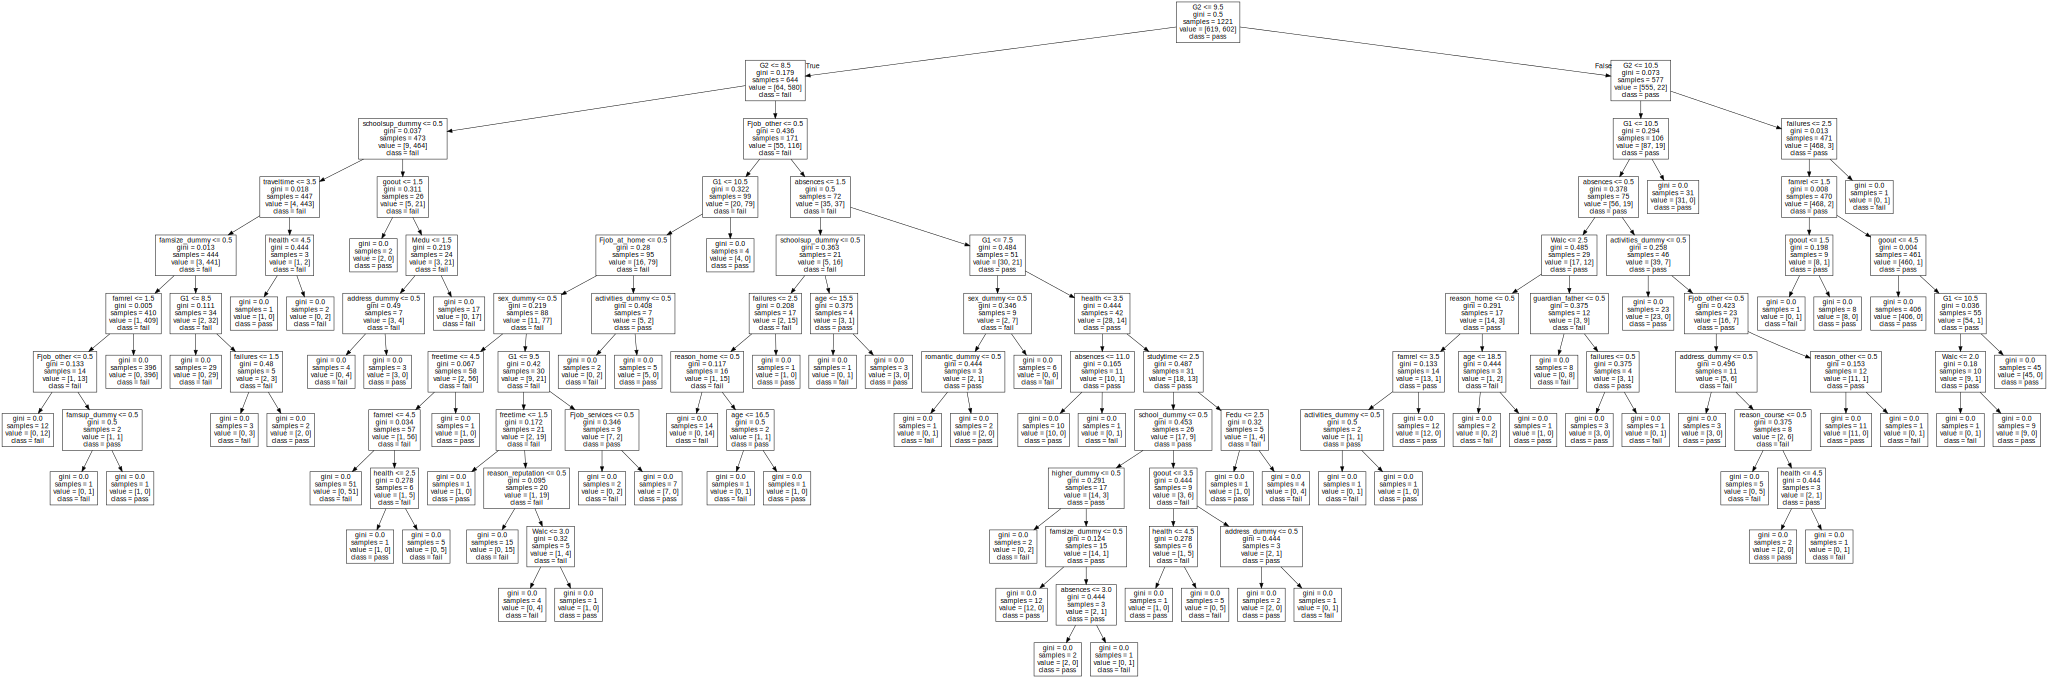

In [45]:
dot_data = tree.export_graphviz(model, feature_names=["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", "G1", "G2", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other'], class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

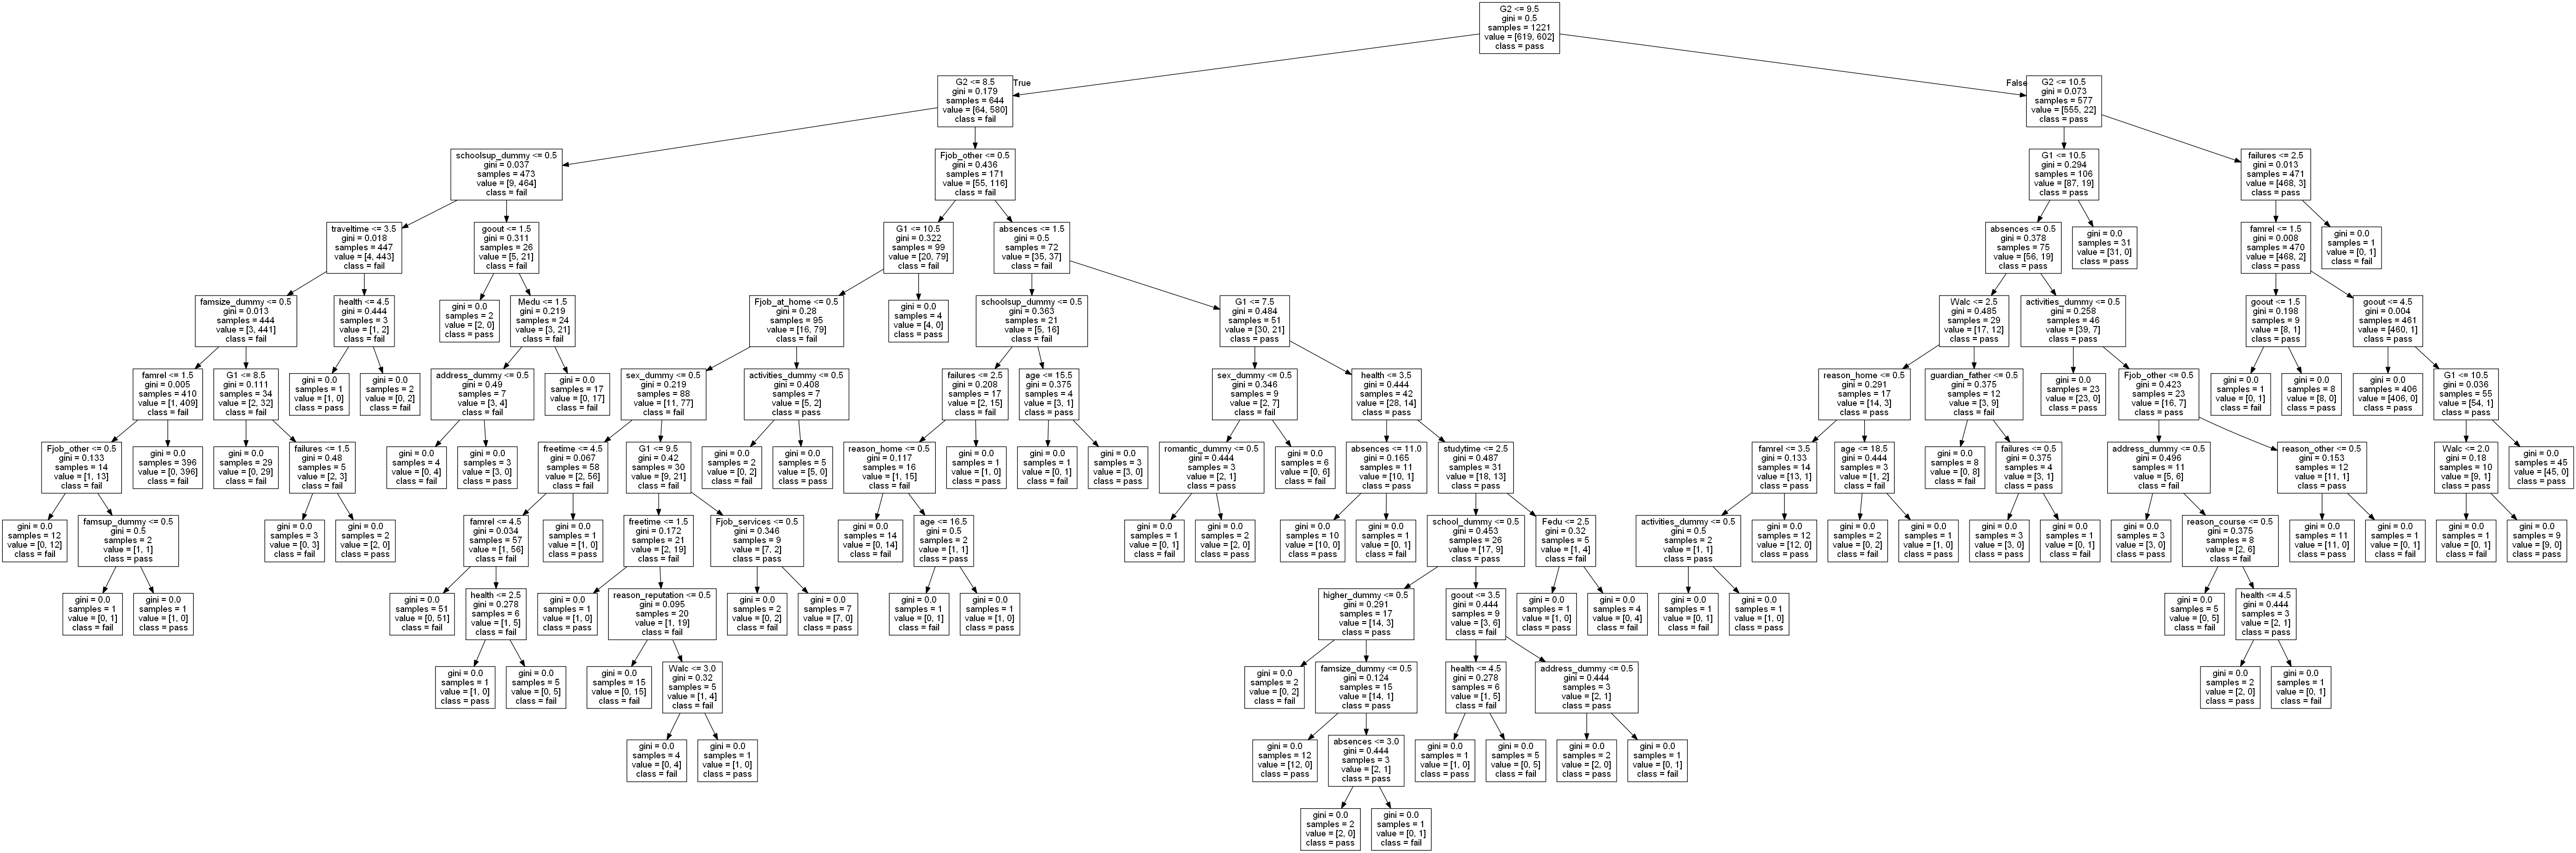

In [46]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Nueral Network

A neural network is another type of classficiation model leveraged in data mining. The model is based on the brain, designed such that input nodes are connected to output (classification) node(s) via hidden nodes and "synapes" (edges). As the neural network is learning and synapses/edges are transpersed by the data, the weights change according to whether or not the data point was appropriately classified.

In [47]:
X_train_float = np.asarray(X_train).astype('float32')
y_train_float = np.asarray(y_train).astype('float32').reshape((-1,1))
X_test_float = np.asarray(X_test).astype('float32')
y_test_float = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_tensor = tf.convert_to_tensor(X_train_float)
y_train_tensor = tf.convert_to_tensor(y_train_float)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [48]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(39,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=250)
y_pred = model.predict_classes(X_test)

Epoch 1/250
39/39 [==============================] - 1s 1ms/step - loss: 0.5069 - accuracy: 0.7266
Epoch 2/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8613
Epoch 3/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8637
Epoch 4/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.8758
Epoch 5/250
39/39 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8635
Epoch 6/250
39/39 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8823
Epoch 7/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.9112
Epoch 8/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9027
Epoch 9/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9120
Epoch 10/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2350 - accuracy: 0.8922
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9538
Epoch 84/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.9364
Epoch 85/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9392
Epoch 86/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.9411
Epoch 87/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1375 - accuracy: 0.9366
Epoch 88/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.9488
Epoch 89/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9351
Epoch 90/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.9408
Epoch 91/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9401
Epoch 92/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9477
Epoch 93/250


39/39 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9698
Epoch 165/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9654
Epoch 166/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9594
Epoch 167/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9693
Epoch 168/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9660
Epoch 169/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9627
Epoch 170/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9686
Epoch 171/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9695
Epoch 172/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9615
Epoch 173/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9693
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9806
Epoch 246/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9706
Epoch 247/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9872
Epoch 248/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9804
Epoch 249/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9826
Epoch 250/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9835


C:\Users\alexm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
results = model.evaluate(X_test_tensor, y_test_tensor)
print("******* Metrics for Nueral Network ***********")
metrics_df = metrics(y_test, np.rint(y_pred), 'Neural Network', metrics_df, True)

13/13 [==============================] - 0s 915us/step - loss: 0.2148 - accuracy: 0.9386
******* Metrics for Nueral Network ***********
Accuracy: 0.9385749385749386
Precision: 0.943127962085308
Recall: 0.9386792452830188
F1 Score 0.9408983451536643
Classification Report:
              precision    recall  f1-score   support

        pass       0.93      0.94      0.94       195
        fail       0.94      0.94      0.94       212

    accuracy                           0.94       407
   macro avg       0.94      0.94      0.94       407
weighted avg       0.94      0.94      0.94       407

Confusion Matrix:
[[183  12]
 [ 13 199]]


## Logistic Regression

A frequently used statistics method, logistic regression has been around for a long time in the study of regression. Computer scientist have leveredge this model in the context of data mining to classify data. Essentially, regression is run on the data, and a sigmoid function classifies the predicted value as to be in one of two classes.

In [50]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
y_pred = model.predict(X_test)

In [52]:
print("******* Metrics for Logistic Regression ***********")
metrics_df = metrics(y_test, y_pred, 'Logistic Regression', metrics_df, True)

******* Metrics for Logistic Regression ***********
Accuracy: 0.9484029484029484
Precision: 0.9483568075117371
Recall: 0.9528301886792453
F1 Score 0.9505882352941176
Classification Report:
              precision    recall  f1-score   support

        pass       0.95      0.94      0.95       195
        fail       0.95      0.95      0.95       212

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[184  11]
 [ 10 202]]


## Ensemble Methods: Random Forests

Random forests is an ensemble methods data mining method that can be leveraged for classification. It is similar to decision trees in that it leverages tree-like structures to make predictions, but differs in that multiple trees are created and the ultimate classifiation of the any data point is dependent on the majority vote of all trees. 

In [53]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = model.predict(X_test)

In [55]:
print("******* Metrics for Random Forest ***********")
metrics_df = metrics(y_test, y_pred, 'Random Forest', metrics_df, True)

******* Metrics for Random Forest ***********
Accuracy: 0.9606879606879607
Precision: 0.9495412844036697
Recall: 0.9764150943396226
F1 Score 0.9627906976744185
Classification Report:
              precision    recall  f1-score   support

        pass       0.97      0.94      0.96       195
        fail       0.95      0.98      0.96       212

    accuracy                           0.96       407
   macro avg       0.96      0.96      0.96       407
weighted avg       0.96      0.96      0.96       407

Confusion Matrix:
[[184  11]
 [  5 207]]


## Support Vector Machines

A support vector machine is capable of performing linear, non-linear, classification and even outlier detection. Since SVM's are particulary useful in complex and small to medium sized data sets, it would be useful to implmenent this model in conjecture with the other models already created. SVM's are sensitive to feauture scaling, all of the feautres seem tto be within a good range except for g1 and g2. This may hinider the performance of tbe SVM and we may look into it later. From our previous discusson the class labels are also heavily weighted towards one class, so SMOTE is also used on this SVM model to make the data more balanced. 

In [56]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=50000)),
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=50000))])

In [57]:
y_pred = svm_clf.predict(X_test)

In [58]:
print("******* Metrics for SVM ***********")
metrics_df = metrics(y_test, y_pred, 'SVM', metrics_df, True)

******* Metrics for SVM ***********
Accuracy: 0.9508599508599509
Precision: 0.9571428571428572
Recall: 0.9481132075471698
F1 Score 0.9526066350710901
Classification Report:
              precision    recall  f1-score   support

        pass       0.94      0.95      0.95       195
        fail       0.96      0.95      0.95       212

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[186   9]
 [ 11 201]]


## Metrics comparison between models

In [59]:
metrics_df

model  accuracy  precision    recall  f1 score includes G1/G2
0        Decision Tree  0.928747   0.914027  0.952830  0.933025           True
1       Neural Network  0.938575   0.943128  0.938679  0.940898           True
2  Logistic Regression  0.948403   0.948357  0.952830  0.950588           True
3        Random Forest  0.960688   0.949541  0.976415  0.962791           True
4                  SVM  0.950860   0.957143  0.948113  0.952607           True

The first row of the matrix shows the number of instances were correctly classified as failed, followed by the number of instances were wrongly classified as failed. The matrix in the second rows show the number of  instaces were wrongly classified as passed, followed by the number of instaces that were correctly classified as passed. The precision shows the perecentage of the 'failed' predictions that were correct, and recall shows the percentage of actual 'failed' data points that were appropriately identified. The f1 score is based on both precision and recall. 

As the results of the models were strong, values for accuracy, precision, recall, and f1 score were all very high (greater than 85% across all runs, and typically exceeding 90%). We might want to examine recall as we should care more about the precision aspect of achiveing accurate predictions on students passing the class, rather than let false positives influence the outcome. We might prefer to have a model that reject many passed students but keeps only students who show more signs of passing the class, making the model a lot more coservative in its predictions. That way we are sure that when generalizing to more training data, the model's prediction accuracy can remain high. 

# Without G1 and G2

G1 and G2, which represent first and second period grades, are highly correlated with G3, final grades. Accordingly, these two features may have a disproportionate impact on the quality of the model. It thus may be of interest to try and predict student performance without these features. If the models are successful, it would suggest that student performance could be predicted based on data from the student's life outside of school performance and before they take their classes. Accordingly, school administrators could target non-academic areas to improve student performance.

In [60]:
X_train= X_train.drop(['G1', 'G2'], axis=1)
X_test = X_test.drop(['G1', 'G2'], axis=1)

In [61]:
X_train

school_dummy  sex_dummy  age  address_dummy  famsize_dummy  \
1422             0          0   16              0              0   
482              0          0   15              1              0   
1543             0          0   17              0              0   
1197             0          0   18              1              0   
1047             0          1   18              0              0   
...            ...        ...  ...            ...            ...   
210              0          0   19              1              0   
1235             0          0   18              1              0   
733              0          0   17              0              1   
635              0          0   17              1              0   
916              1          0   16              0              0   

      pstatus_dummy  Medu  Fedu  traveltime  studytime  ...  Fjob_other  \
1422              1     4     4           1          2  ...           0   
482               1     4     2           1          3  ...           1   
1543              1     1     1           1          1  ...           1   
1197              1     1     2           1          1  ...           1   
1047              1     3     2           1          1  ...           0   
...             ...   ...   ...         ...        ...  ...         ...   
210               1     3     3           1          4  ...           1   
1235              1     2     1           1          2  ...           0   
733               1     3     1           2          4  ...           1   
635               1     3     2           1          2  ...           1   
916               1     2     3           2          2  ...           0   

      Fjob_services  Fjob_teacher  reason_course  reason_home  reason_other  \
1422              0             0              0            0             0   
482               0             0              0            0             0   
1543              0             0              0            0             0   
1197              0             0              1            0             0   
1047              0             0              0            0             0   
...             ...           ...            ...          ...           ...   
210               0             0              0            0             0   
1235              1             0              0            0             0   
733               0             0              0            0             0   
635               0             0              1            0             0   
916               1             0              0            0             1   

      reason_reputation  guardian_father  guardian_mother  guardian_other  
1422                  0                0                1               0  
482                   1                0                1               0  
1543                  0                0                1               0  
1197                  0                0                0               0  
1047                  0                1                0               0  
...                 ...              ...              ...             ...  
210                   1                0                0               1  
1235                  0                0                1               0  
733                   1                0                1               0  
635                   0                0                1               0  
916                   0                0                1               0  

[1221 rows x 37 columns]

## Decision Tree

In [62]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))

In [63]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
print("******* Metrics for Decision Tree ***********")
metrics_df = metrics(y_test, y_pred, 'Decision Tree', metrics_df, False)

******* Metrics for Decision Tree ***********
Accuracy: 0.7665847665847666
Precision: 0.7671232876712328
Recall: 0.7924528301886793
F1 Score 0.7795823665893271
Classification Report:
              precision    recall  f1-score   support

        pass       0.77      0.74      0.75       195
        fail       0.77      0.79      0.78       212

    accuracy                           0.77       407
   macro avg       0.77      0.77      0.77       407
weighted avg       0.77      0.77      0.77       407

Confusion Matrix:
[[144  51]
 [ 44 168]]


In [65]:
printTreeData(model, X_train, y_train, X_test, y_test)

Tree depth: 16
Total leaves: 225
Feature importance: [0.01572235 0.01972459 0.02996524 0.01724055 0.04771922 0.00534933
 0.04822642 0.01481504 0.03120303 0.0216239  0.06568338 0.00885243
 0.00629516 0.01920875 0.02228148 0.01219247 0.09402699 0.01209871
 0.01536651 0.01373919 0.04052648 0.04034002 0.01977868 0.0313753
 0.10401064 0.02153191 0.02057866 0.03233032 0.02536712 0.00465428
 0.03017949 0.01459783 0.00490491 0.01160979 0.04232225 0.02348762
 0.01107   ]
Train Score: 0.9975429975429976
Test Score: 0.7665847665847666


### Display Tree

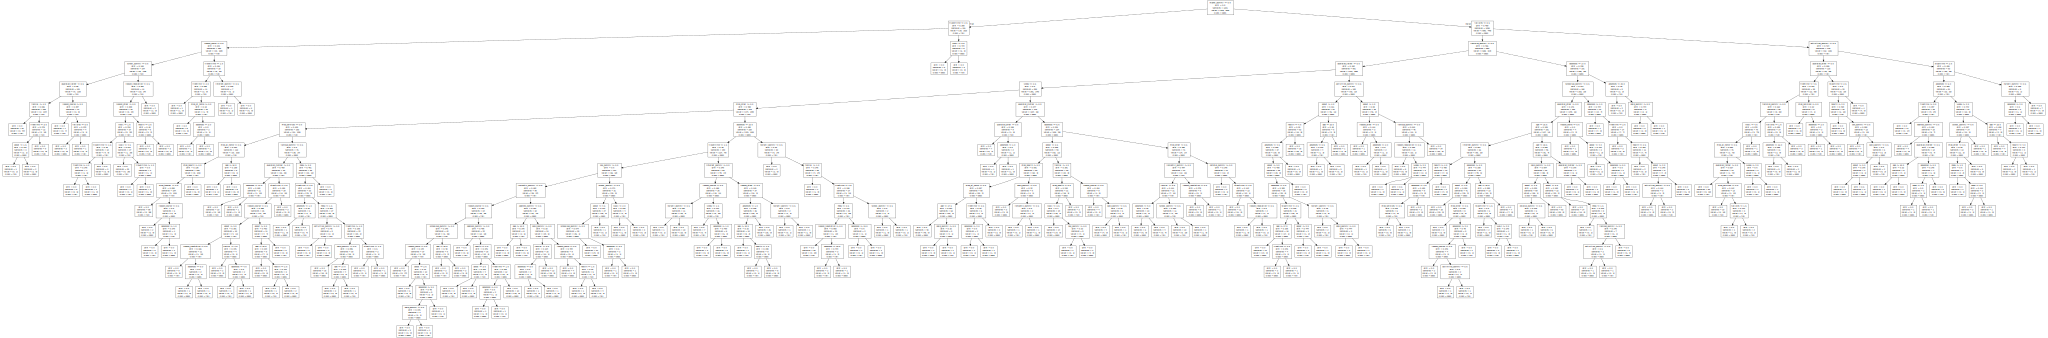

In [66]:
dot_data = tree.export_graphviz(model, feature_names=["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other'], class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

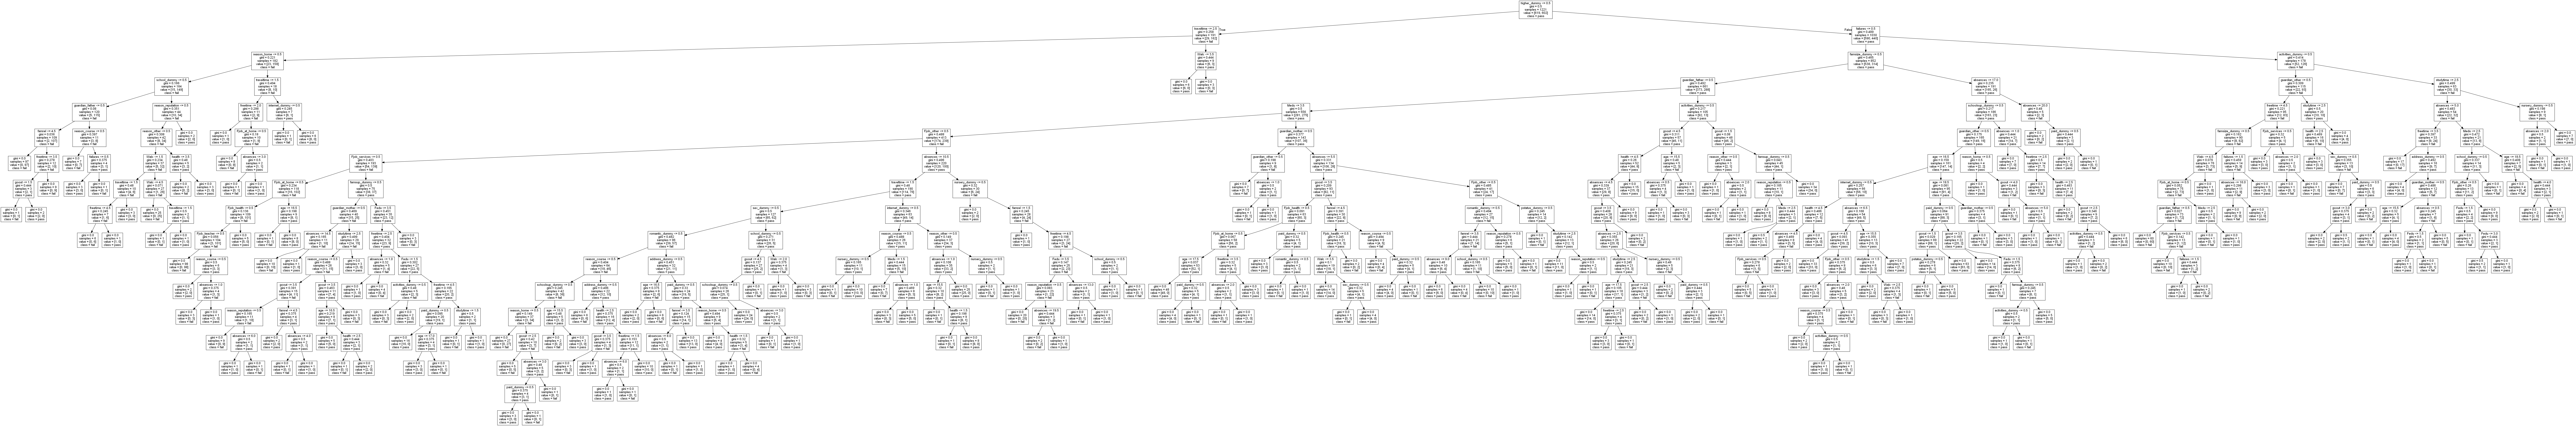

In [67]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Nueral Network

In [68]:
X_train_float = np.asarray(X_train).astype('float32')
y_train_float = np.asarray(y_train).astype('float32').reshape((-1,1))
X_test_float = np.asarray(X_test).astype('float32')
y_test_float = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_tensor = tf.convert_to_tensor(X_train_float)
y_train_tensor = tf.convert_to_tensor(y_train_float)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [69]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(37,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=350)
y_pred = model.predict_classes(X_test)

Epoch 1/350
39/39 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 2/350
39/39 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.6115
Epoch 3/350
39/39 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.6226
Epoch 4/350
39/39 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.6599
Epoch 5/350
39/39 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.6622
Epoch 6/350
39/39 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.6842
Epoch 7/350
39/39 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.6828
Epoch 8/350
39/39 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7198
Epoch 9/350
39/39 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.6846
Epoch 10/350
39/39 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.6677
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8239
Epoch 84/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8485
Epoch 85/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8501
Epoch 86/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8230
Epoch 87/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8342
Epoch 88/350
39/39 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8099
Epoch 89/350
39/39 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8298
Epoch 90/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8528
Epoch 91/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8485
Epoch 92/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8437
Epoch 93/350


39/39 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8538
Epoch 165/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8796
Epoch 166/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.9007
Epoch 167/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8818
Epoch 168/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.8813
Epoch 169/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8736
Epoch 170/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8703
Epoch 171/350
39/39 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8561
Epoch 172/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.9048
Epoch 173/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9147
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.9276
Epoch 246/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1599 - accuracy: 0.9353
Epoch 247/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9346
Epoch 248/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9347
Epoch 249/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9506
Epoch 250/350
39/39 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.9180
Epoch 251/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9372
Epoch 252/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.9576
Epoch 253/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9249
Epoch 254/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1481 - accuracy: 0.9430
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9722
Epoch 327/350
39/39 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9824
Epoch 328/350
39/39 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9760
Epoch 329/350
39/39 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.8201
Epoch 330/350
39/39 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9681
Epoch 331/350
39/39 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9714
Epoch 332/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9321
Epoch 333/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9520
Epoch 334/350
39/39 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9548
Epoch 335/350
39/39 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9637
Epoc

C:\Users\alexm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [70]:
results = model.evaluate(X_test_tensor, y_test_tensor)
print("******* Metrics for Nueral Network ***********")
metrics_df = metrics(y_test, np.rint(y_pred), 'Neural Network', metrics_df, False)

13/13 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.8231
******* Metrics for Nueral Network ***********
Accuracy: 0.8230958230958231
Precision: 0.8271028037383178
Recall: 0.8349056603773585
F1 Score 0.8309859154929577
Classification Report:
              precision    recall  f1-score   support

        pass       0.82      0.81      0.81       195
        fail       0.83      0.83      0.83       212

    accuracy                           0.82       407
   macro avg       0.82      0.82      0.82       407
weighted avg       0.82      0.82      0.82       407

Confusion Matrix:
[[158  37]
 [ 35 177]]


## Logistic Regression

In [71]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
y_pred = model.predict(X_test)

In [73]:
print("******* Metrics for Logistic Regression ***********")
metrics_df = metrics(y_test, y_pred, 'Logistic Regression', metrics_df, False)

******* Metrics for Logistic Regression ***********
Accuracy: 0.8181818181818182
Precision: 0.875
Recall: 0.7594339622641509
F1 Score 0.8131313131313131
Classification Report:
              precision    recall  f1-score   support

        pass       0.77      0.88      0.82       195
        fail       0.88      0.76      0.81       212

    accuracy                           0.82       407
   macro avg       0.82      0.82      0.82       407
weighted avg       0.83      0.82      0.82       407

Confusion Matrix:
[[172  23]
 [ 51 161]]


## Ensemble Methods: Random Forest

In [74]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = model.predict(X_test)

In [76]:
print("******* Metrics for Random Forest ***********")
metrics_df = metrics(y_test, y_pred, 'Random Forest', metrics_df, False)

******* Metrics for Random Forest ***********
Accuracy: 0.8353808353808354
Precision: 0.8502415458937198
Recall: 0.8301886792452831
F1 Score 0.8400954653937948
Classification Report:
              precision    recall  f1-score   support

        pass       0.82      0.84      0.83       195
        fail       0.85      0.83      0.84       212

    accuracy                           0.84       407
   macro avg       0.84      0.84      0.84       407
weighted avg       0.84      0.84      0.84       407

Confusion Matrix:
[[164  31]
 [ 36 176]]


## Support Vector Machines

In [77]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=100000))])

In [78]:
y_pred = svm_clf.predict(X_test)

In [79]:
print("******* Metrics for SVM ***********")
metrics_df = metrics(y_test, y_pred, 'SVM', metrics_df, False)

******* Metrics for SVM ***********
Accuracy: 0.8157248157248157
Precision: 0.9151515151515152
Recall: 0.7122641509433962
F1 Score 0.8010610079575597
Classification Report:
              precision    recall  f1-score   support

        pass       0.75      0.93      0.83       195
        fail       0.92      0.71      0.80       212

    accuracy                           0.82       407
   macro avg       0.83      0.82      0.81       407
weighted avg       0.84      0.82      0.81       407

Confusion Matrix:
[[181  14]
 [ 61 151]]


## Metrics comparison between models

In [80]:
metrics_df

model  accuracy  precision    recall  f1 score includes G1/G2
0        Decision Tree  0.928747   0.914027  0.952830  0.933025           True
1       Neural Network  0.938575   0.943128  0.938679  0.940898           True
2  Logistic Regression  0.948403   0.948357  0.952830  0.950588           True
3        Random Forest  0.960688   0.949541  0.976415  0.962791           True
4                  SVM  0.950860   0.957143  0.948113  0.952607           True
5        Decision Tree  0.766585   0.767123  0.792453  0.779582          False
6       Neural Network  0.823096   0.827103  0.834906  0.830986          False
7  Logistic Regression  0.818182   0.875000  0.759434  0.813131          False
8        Random Forest  0.835381   0.850242  0.830189  0.840095          False
9                  SVM  0.815725   0.915152  0.712264  0.801061          False

Overall, the results of the data mining models were strong. Logistic Regression, Random Forest, and SVM methods generally outperformed Decision Tree and Neural Network models across a number of runs when G1 and G2 were included. Not including G1/G2 made a large impact on the accuracy of the final results, as expected. However, model results were still strong overall.
given that all results were good, the results of the models imply that data mining classifiers are able to moderately capable of predicting whether or not students will pass or fail their classes. 